## load packages

In [5]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 2s (1,143 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 155332 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
plt.rcParams['figure.figsize'] = (12,10)

In [8]:
pip install -U esda

     |████████████████████████████████| 95 kB 2.0 MB/s 
     |████████████████████████████████| 2.4 MB 22.4 MB/s 
  Created wheel for esda: filename=esda-2.4.1-py3-none-any.whl size=117429 sha256=d52a987f470e1dfd313f5d17becbe9651f2a64a77a373d3795c928bac8dfa1fc
  Stored in directory: /root/.cache/pip/wheels/ed/67/c5/4558a178be4c410f341c31f71b5aba9c761a40c9d17dbdfddd
Successfully built esda


In [9]:
import esda

## load and fix data

In [10]:
ct = gpd.read_file('/content/drive/MyDrive/Advanced Spatial/project 1/ct_canopy_2010_geom.geojson')

In [11]:
ct.dtypes

GEOID                                                                                             object
STATEFP10                                                                                         object
COUNTYFP10                                                                                        object
TRACTCE10                                                                                         object
NAME10                                                                                            object
NAMELSAD10                                                                                        object
MTFCC10                                                                                           object
FUNCSTAT10                                                                                        object
ALAND10                                                                                            int64
AWATER10                                               

In [12]:
# fix column headers 

ct.columns = ct.columns.str.replace('!!','_')

In [13]:
ct.columns = ct.columns.str.replace(' ','_')

In [14]:
# make numbers numeric

ct[['Percent_RACE_One_race_White','Percent_RACE_One_race_Black_or_African_American',
       'Percent_RACE_One_race_Asian',
       'Percent_HISPANIC_OR_LATINO_AND_RACE_Hispanic_or_Latino_(of_any_race)','Estimate_Median_household_income_in_the_past_12_months_(in_2010_inflation-adjusted_dollars)']] = ct[['Percent_RACE_One_race_White','Percent_RACE_One_race_Black_or_African_American',
       'Percent_RACE_One_race_Asian',
       'Percent_HISPANIC_OR_LATINO_AND_RACE_Hispanic_or_Latino_(of_any_race)','Estimate_Median_household_income_in_the_past_12_months_(in_2010_inflation-adjusted_dollars)']].apply(pd.to_numeric, errors='coerce')

In [15]:
# give columns descriptive, shorter names

column_rename = ['GEOID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'NAME10', 
                 'NAMELSAD10','MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 
                 'INTPTLAT10','INTPTLON10',
  'canopy no change (area)',
  'canopy gain (area)',
  'canopy loss (area)',
  'canopy total 2010 (area)',
  'canopy total 2017 (area)',
  'canopy gain (percent)',
  'canopy loss (percent)',
  'canopy 2010 per area (percent)',
  'canopy 2017 per area (percent)',
  'White (percent)',
  'Black (percent)',
  'Asian (percent)',
  'Latino_Hispanic (any race) (percent) ',
  'housing units (total)',
  'single family homes (percent of hhs)',
  'owner occupied (percent of hhs)',
  'renter (percent of hhs)',
  'moved in since 2005 (percent of hhs)',
  'home value',
  'rent',
  'rent burdened (rent per income over 35 percent)(percent of hhs)',
  'building built since 2000 (percent of hhs)',
  'median income',
  'geometry'
  ]

In [16]:
ct.columns=column_rename

## check missing data

In [ ]:
# check missing values

missing = []

for var in ct.columns:
  missing.append(ct[var].isna().sum() / ct.shape[0])

missing=pd.DataFrame({'var':ct.columns, 'pct_missing': missing})
missing

var  pct_missing
0                                               GEOID     0.000000
1                                           STATEFP10     0.000000
2                                          COUNTYFP10     0.000000
3                                           TRACTCE10     0.000000
4                                              NAME10     0.000000
5                                          NAMELSAD10     0.000000
6                                             MTFCC10     0.000000
7                                          FUNCSTAT10     0.000000
8                                             ALAND10     0.000000
9                                            AWATER10     0.000000
10                                         INTPTLAT10     0.000000
11                                         INTPTLON10     0.000000
12                            canopy no change (area)     0.000000
13                                 canopy gain (area)     0.000000
14                                 canopy loss (area)     0.000000
15                           canopy total 2010 (area)     0.000000
16                           canopy total 2017 (area)     0.000000
17                              canopy gain (percent)     0.001845
18                              canopy loss (percent)     0.001845
19                     canopy 2010 per area (percent)     0.001845
20                     canopy 2017 per area (percent)     0.001845
21                                    White (percent)     0.021679
22                                    Black (percent)     0.021679
23                                    Asian (percent)     0.021679
24              Latino_Hispanic (any race) (percent)      0.021679
25                              housing units (total)     0.000000
26               single family homes (percent of hhs)     0.023985
27                    owner occupied (percent of hhs)     0.023985
28                            renter (percent of hhs)     0.023985
29               moved in since 2005 (percent of hhs)     0.023985
30                                         home value     0.122232
31                                               rent     0.058579
32  rent burdened (rent per income over 35 percent...     0.026753
33         building built since 2000 (percent of hhs)     0.023985
34                                      median income     0.027214
35                                           geometry     0.000000

In [ ]:
# mostly _fairly_ complete, should be enough to use

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


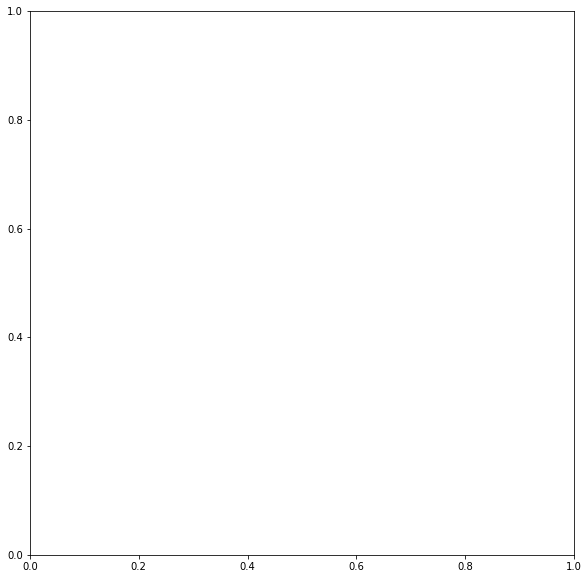

In [ ]:
# map areas with _all_ census data missing

ct[ct.iloc[:,21:].isna().all(axis=1)].plot()

# none!

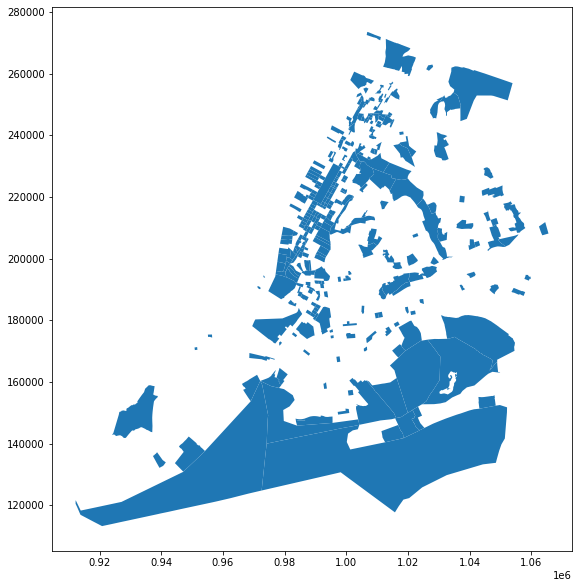

In [ ]:
# map areas with some census data missing

ct[ct.iloc[:,21:].isna().any(axis=1)].plot()

# eek lots.

## compute plot temporal autocorrelation and net change in canopy cover

In [17]:
lm = sm.OLS(ct['canopy total 2017 (area)'], ct['canopy total 2010 (area)']).fit()

In [18]:
lm.rsquared

0.9972814517196247

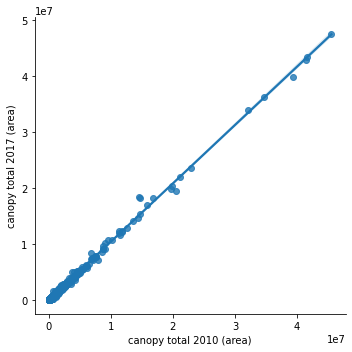

In [19]:
sns.lmplot(x='canopy total 2010 (area)', y='canopy total 2017 (area)', data=ct)

In [20]:
# map the residuals

In [21]:
ct['canopy change residual'] = lm.resid

In [22]:
ct['canopy change (net)(area)'] = ct['canopy gain (area)'] - ct['canopy loss (area)']

(904434.9465324506, 1075065.689038295, 105273.87773070556, 281601.951450603)

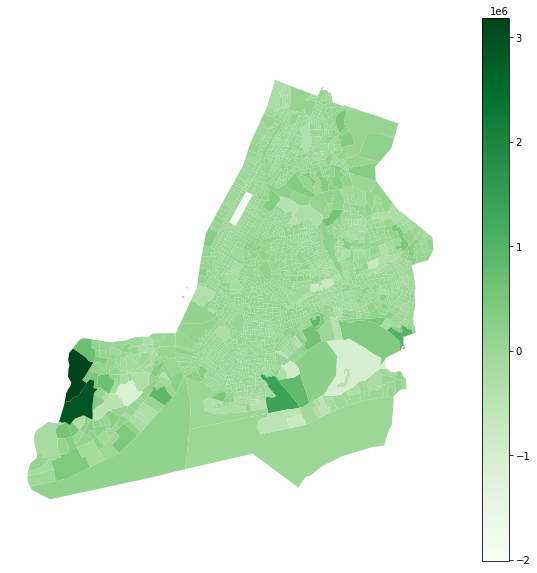

In [23]:
ct.plot(column='canopy change residual', cmap='Greens', legend=True, figsize=(10,10))
plt.axis('off')

In [24]:
# reorder columns

ct = ct[['GEOID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'NAME10', 'NAMELSAD10',
       'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'canopy no change (area)', 'canopy gain (area)',
       'canopy loss (area)', 'canopy change (net)(area)','canopy total 2010 (area)',
       'canopy total 2017 (area)', 'canopy gain (percent)',
       'canopy loss (percent)', 'canopy 2010 per area (percent)',
       'canopy 2017 per area (percent)', 'canopy change residual', 'White (percent)', 'Black (percent)',
       'Asian (percent)', 'Latino_Hispanic (any race) (percent) ',
       'housing units (total)', 'single family homes (percent of hhs)',
       'owner occupied (percent of hhs)', 'renter (percent of hhs)',
       'moved in since 2005 (percent of hhs)', 'home value', 'rent',
       'rent burdened (rent per income over 35 percent)(percent of hhs)',
       'building built since 2000 (percent of hhs)', 'median income',
       'geometry']]

# bring in fractal measures

In [109]:
frac = pd.read_csv('/content/drive/MyDrive/Advanced Spatial/project 1/frac_result.csv', index_col=0)

In [110]:
frac = frac.rename(columns={'ct_list':'GEOID'})

In [111]:
frac['GEOID'] = frac['GEOID'].astype(str)

In [112]:
frac = frac.set_index('GEOID')

In [113]:
frac.head()

no_canopy_2010_results  canopy_2010_results  \
GEOID                                                      
36061027100                1.182345             1.096982   
36061012900                1.110692             1.097259   
36061014401                1.149512             1.127940   
36061009900                1.296445             1.092255   
36061014601                1.285764             1.113610   

             no_canopy_2017_results  canopy_2017_results  
GEOID                                                     
36061027100                1.114390             1.108241  
36061012900                1.181303             1.109161  
36061014401                1.218873             1.145459  
36061009900                1.183441             1.118850  
36061014601                1.203559             1.145191

In [114]:
frac.columns = ['noncanopy frac 2010', 'canopy frac 2010', 'noncanopy frac 2017', 'canopy frac 2017']

In [115]:
frac['noncanopy frac change'] = frac['noncanopy frac 2017'] - frac['noncanopy frac 2010']
frac['canopy frac change'] = frac['canopy frac 2017'] - frac['canopy frac 2010']

In [116]:
frac.head()

noncanopy frac 2010  canopy frac 2010  noncanopy frac 2017  \
GEOID                                                                     
36061027100             1.182345          1.096982             1.114390   
36061012900             1.110692          1.097259             1.181303   
36061014401             1.149512          1.127940             1.218873   
36061009900             1.296445          1.092255             1.183441   
36061014601             1.285764          1.113610             1.203559   

             canopy frac 2017  noncanopy frac change  canopy frac change  
GEOID                                                                     
36061027100          1.108241              -0.067955            0.011259  
36061012900          1.109161               0.070611            0.011903  
36061014401          1.145459               0.069361            0.017518  
36061009900          1.118850              -0.113004            0.026596  
36061014601          1.145191              -0.082206            0.031581

In [117]:
frac = gpd.GeoDataFrame(data=frac, geometry=ct.set_index('GEOID')['geometry'])

In [118]:
from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

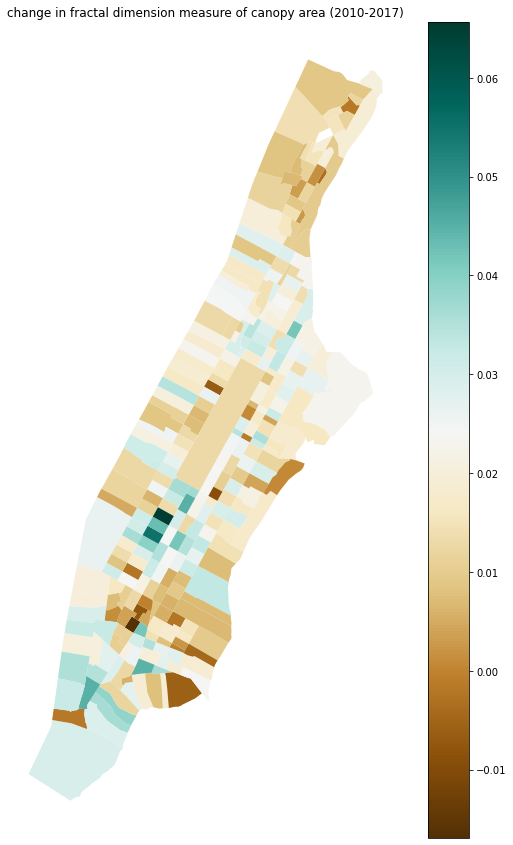

In [119]:
fig,ax = plt.subplots(figsize=(10,15))


# place colorband legend
#divider = make_axes_locatable(ax)
#cax = divider.append_axes('right', size='4%', pad=0.1, label="Title")

# norm colors
vmin, vmax, vcenter = frac['canopy frac change'].min(), frac['canopy frac change'].max(), 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
cmap = 'BrBG'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

frac.plot(column = 'canopy frac change', legend=True, cmap=cmap, ax=ax) #cax=cax)


ax.axis('off')

#ax.tick_params(axis='both', bottom=False, left=False,labelbottom=False, labelleft=False)

ax.set_title('change in fractal dimension measure of canopy area (2010-2017)')
plt.show()

In [120]:
from matplotlib.gridspec import GridSpec

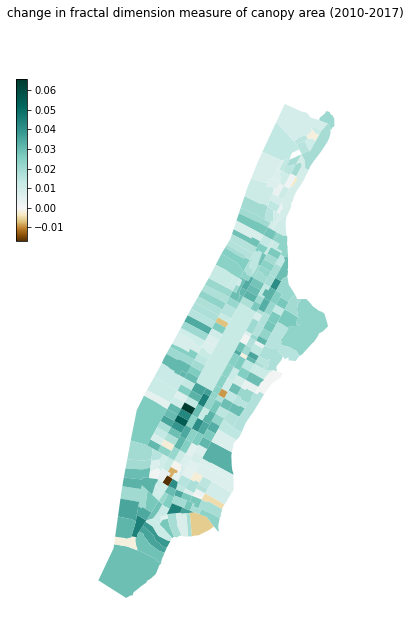

In [121]:
fig = plt.figure()

# place axes
gs = GridSpec(50, 50)
ax0 = fig.add_subplot(gs[:, :])
ax1 = fig.add_subplot(gs[:15,10:11])
    
# norm colors
vmin, vmax, vcenter = frac['canopy frac change'].min(), frac['canopy frac change'].max(), 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
cmap = 'BrBG'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

# plot data
frac.plot(column='canopy frac change', 
          legend=True, 
          cmap=cmap, 
          norm=norm,
          ax=ax0, 
          cax=ax1
          )



ax0.axis('off')

plt.suptitle('change in fractal dimension measure of canopy area (2010-2017)')
plt.show()

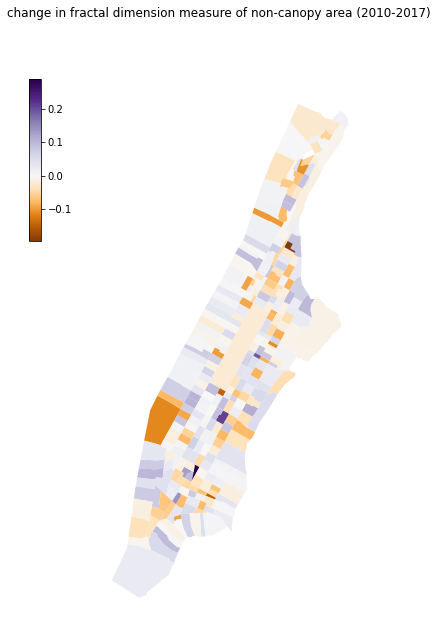

In [122]:
fig = plt.figure()

# place axes
gs = GridSpec(50, 50)
ax0 = fig.add_subplot(gs[:, :])
ax1 = fig.add_subplot(gs[:15,10:11])

# norm colors
vmin, vmax, vcenter = frac['noncanopy frac change'].min(), frac['noncanopy frac change'].max(), 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
cmap = 'PuOr'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)


frac.plot(
    column='noncanopy frac change', 
    legend=True, 
    cmap=cmap,
    norm=norm, 
    ax=ax0,
    cax=ax1
    )

ax0.axis('off')

plt.suptitle('change in fractal dimension measure of non-canopy area (2010-2017)')

plt.show()

# try a regression, look at correlations

In [ ]:
# try a regression

lm = sm.OLS(
    ct['canopy gain (percent)'], 
    sm.add_constant(ct['White (percent)']),
    missing = 'drop'
    ).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     canopy gain (percent)   R-squared:                       0.008
Model:                               OLS   Adj. R-squared:                  0.008
Method:                    Least Squares   F-statistic:                     17.41
Date:                   Mon, 07 Mar 2022   Prob (F-statistic):           3.13e-05
Time:                           16:05:57   Log-Likelihood:                 825.42
No. Observations:                   2121   AIC:                            -1647.
Df Residuals:                       2119   BIC:                            -1636.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3498      0.006     56.686      0.000       0.338       0.362
White (percent)    -0.0005      0.000     -4.173      0.000      -0.001      -0.000
==============================================================================
Omnibus:                     1075.588   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10430.166
Skew:                           2.180   Prob(JB):                         0.00
Kurtosis:                      12.951   Cond. No.                         94.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# check correlations between variables

corr = ct.corr()

In [41]:
vars = ['canopy no change (area)', 'canopy gain (area)',
       'canopy loss (area)', 'canopy change (net)(area)', 'canopy total 2010 (area)',
       'canopy total 2017 (area)', 'canopy gain (percent)',
       'canopy loss (percent)', 'canopy 2010 per area (percent)',
       'canopy 2017 per area (percent)', 'canopy change residual', 'White (percent)', 'Black (percent)',
       'Asian (percent)', 'Latino_Hispanic (any race) (percent) ',
       'single family homes (percent of hhs)',
       'owner occupied (percent of hhs)', 'renter (percent of hhs)',
       'moved in since 2005 (percent of hhs)', 'home value', 'rent',
       'rent burdened (rent per income over 35 percent)(percent of hhs)',
       'building built since 2000 (percent of hhs)', 'median income']

In [ ]:
corr = corr.loc[vars, vars]

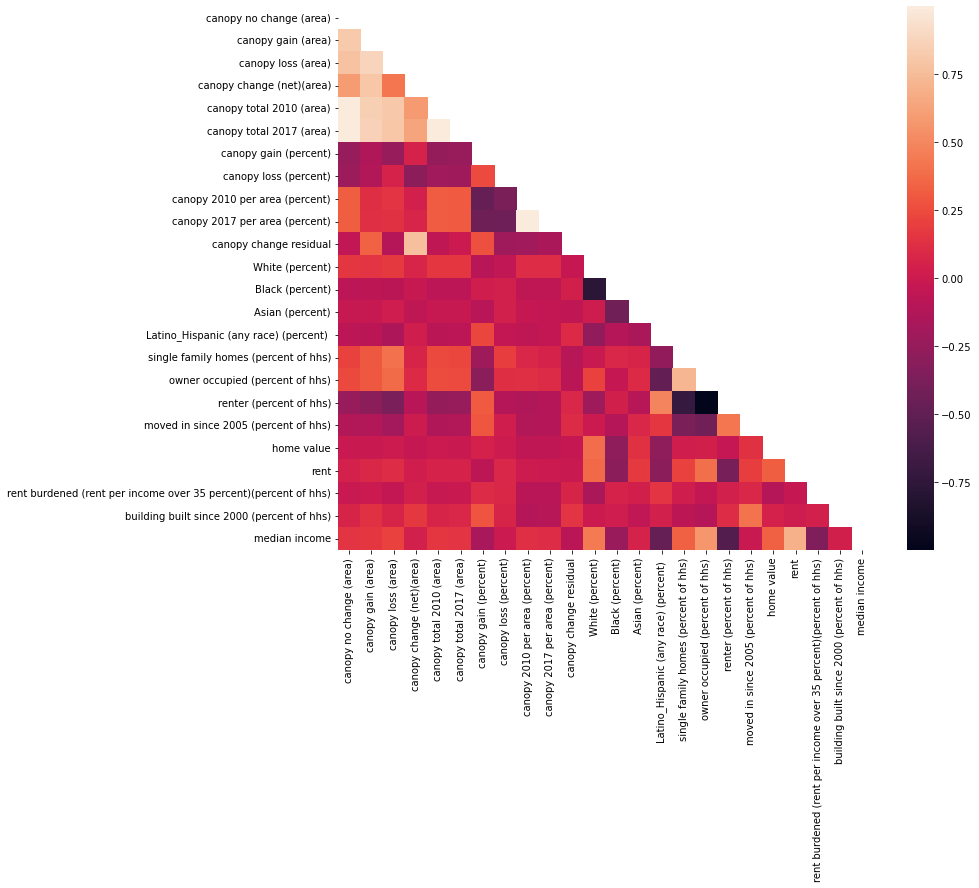

In [ ]:
corr_mask = np.zeros_like(corr)
corr_mask[np.triu_indices_from(corr_mask)] = True

sns.heatmap(corr, mask=corr_mask)

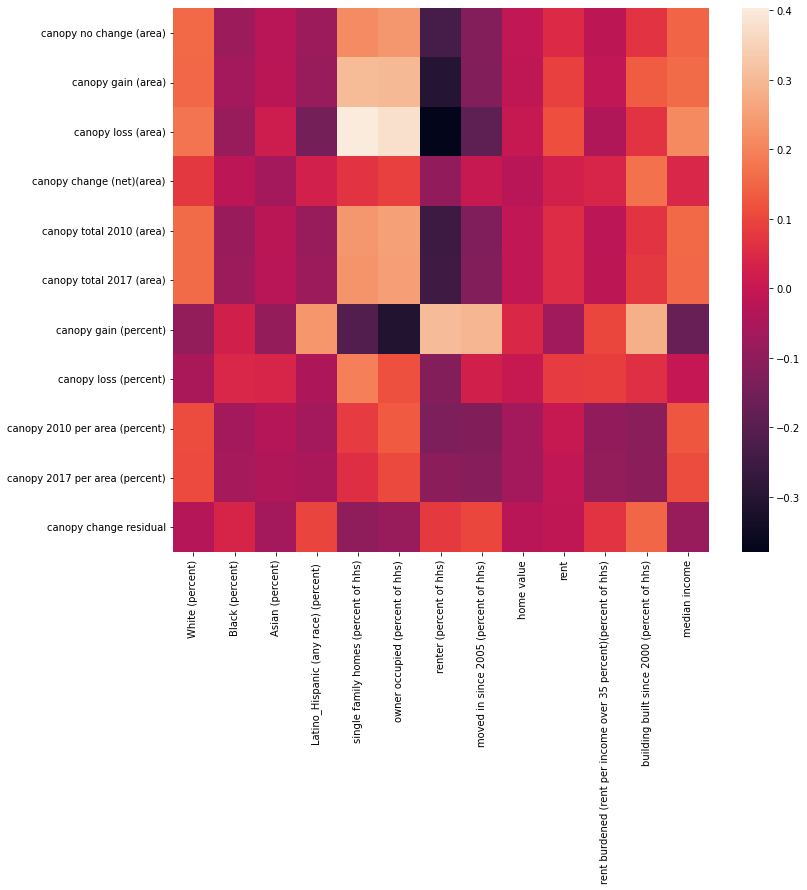

In [ ]:
# now just the canopy variabls x the explanatory variables

sns.heatmap(corr.loc[vars[:11], vars[11:]])

In [ ]:
# percent canopy gain and percent owner-occupied look like a match

In [ ]:
lm = sm.regression.linear_model.OLS(ct['canopy gain (percent)'], sm.add_constant(ct['owner occupied (percent of hhs)']), missing='drop').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     canopy gain (percent)   R-squared:                       0.095
Model:                               OLS   Adj. R-squared:                  0.094
Method:                    Least Squares   F-statistic:                     221.4
Date:                   Mon, 07 Mar 2022   Prob (F-statistic):           1.08e-47
Time:                           16:06:00   Log-Likelihood:                 920.90
No. Observations:                   2116   AIC:                            -1838.
Df Residuals:                       2114   BIC:                            -1826.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.4018      0.006     67.125      0.000       0.390       0.414
owner occupied (percent of hhs)    -0.0020      0.000    -14.878      0.000      -0.002      -0.002
==============================================================================
Omnibus:                      983.658   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9758.365
Skew:                           1.939   Prob(JB):                         0.00
Kurtosis:                      12.780   Cond. No.                         80.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# hm but that's not great

Text(0.5, 1.0, 'tree canopy gain (percentage of previous canopy) ~ percent of households owner occupied')

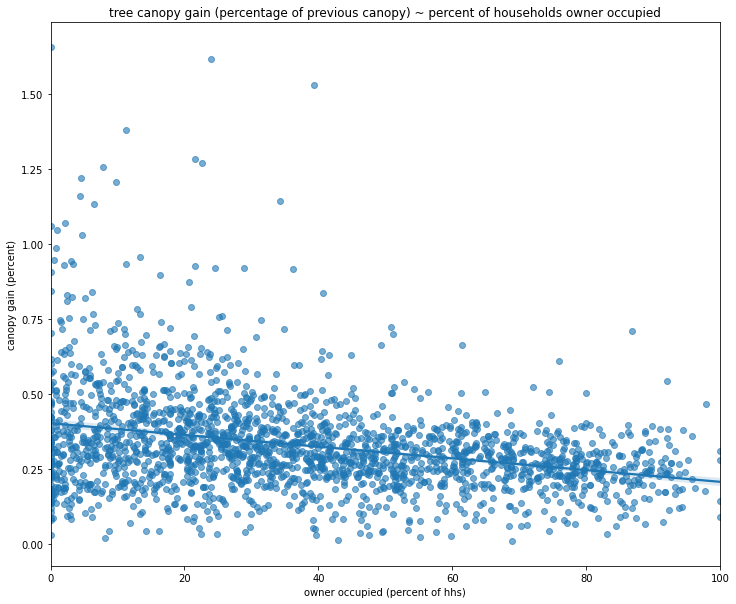

In [ ]:
sns.regplot(y='canopy gain (percent)', x='owner occupied (percent of hhs)', data=ct, scatter_kws={'alpha':0.6})
plt.xlim(0,100)

plt.title('tree canopy gain (percentage of previous canopy) ~ percent of households owner occupied')

Text(0.5, 1.0, 'tree canopy gain (percentage of previous canopy) ~ percent of households owner occupied')

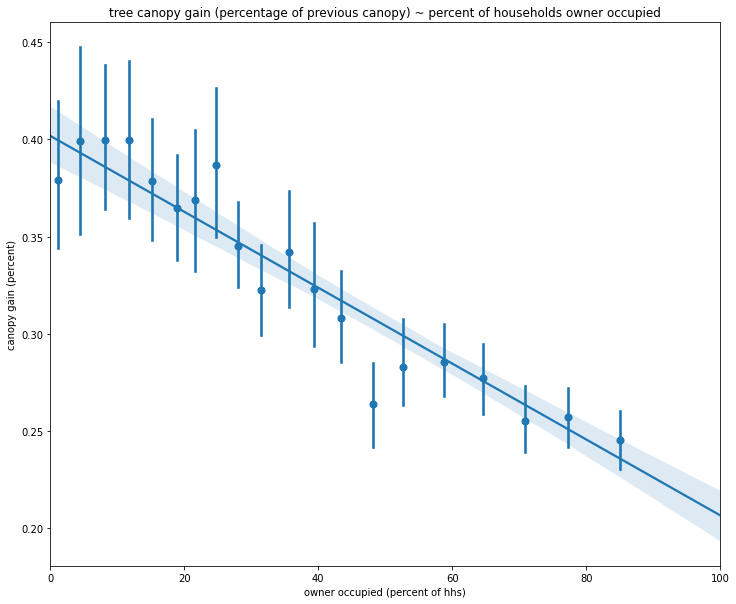

In [ ]:
sns.regplot(y='canopy gain (percent)', x='owner occupied (percent of hhs)', data=ct, x_bins=20)
plt.xlim(0,100)

plt.title('tree canopy gain (percentage of previous canopy) ~ percent of households owner occupied')

In [ ]:
# how about percent canopy gain vs income? 

In [ ]:
lm = sm.OLS(ct['canopy gain (percent)'], sm.add_constant(ct['median income']), missing='drop').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     canopy gain (percent)   R-squared:                       0.029
Model:                               OLS   Adj. R-squared:                  0.028
Method:                    Least Squares   F-statistic:                     62.04
Date:                   Mon, 07 Mar 2022   Prob (F-statistic):           5.36e-15
Time:                           16:06:05   Log-Likelihood:                 843.28
No. Observations:                   2109   AIC:                            -1683.
Df Residuals:                       2107   BIC:                            -1671.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3877      0.008     47.030      0.000       0.371       0.404
median income -1.071e-06   1.36e-07     -7.876      0.000   -1.34e-06   -8.05e-07
==============================================================================
Omnibus:                     1138.827   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13045.804
Skew:                           2.302   Prob(JB):                         0.00
Kurtosis:                      14.281   Cond. No.                     1.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# not a strong linear relationship but the coefficient is significant and negative (which is maybe surprising)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'tree canopy gain (percentage of previous canopy) ~ median income')

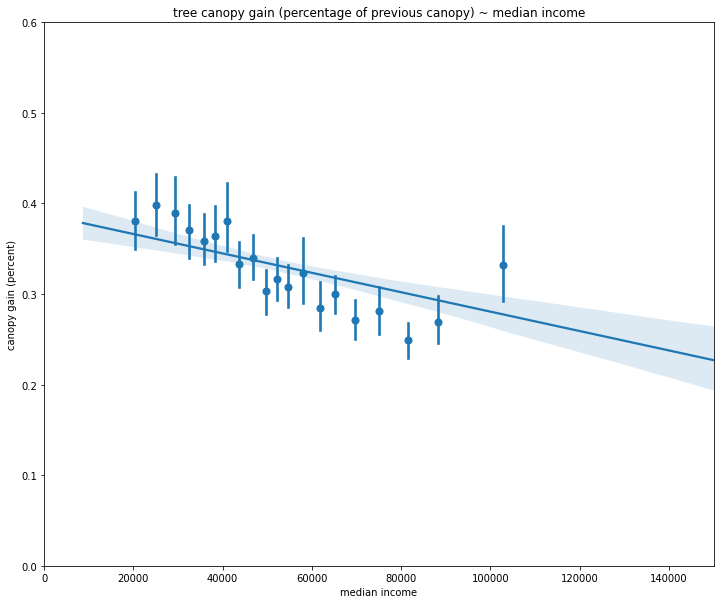

In [ ]:
sns.regplot('median income', 'canopy gain (percent)', data=ct, truncate=True, x_bins=20)

plt.ylim(0,.6)
plt.xlim(0, 150000)

plt.title('tree canopy gain (percentage of previous canopy) ~ median income')

In [ ]:
# negative relationship is surprising. (squinting, it looks like it is may be a power curve but I'm not sure why)

# spatial weights and autocorrelation

In [42]:
from libpysal.weights.contiguity import Queen

In [43]:
w = Queen.from_dataframe(ct)


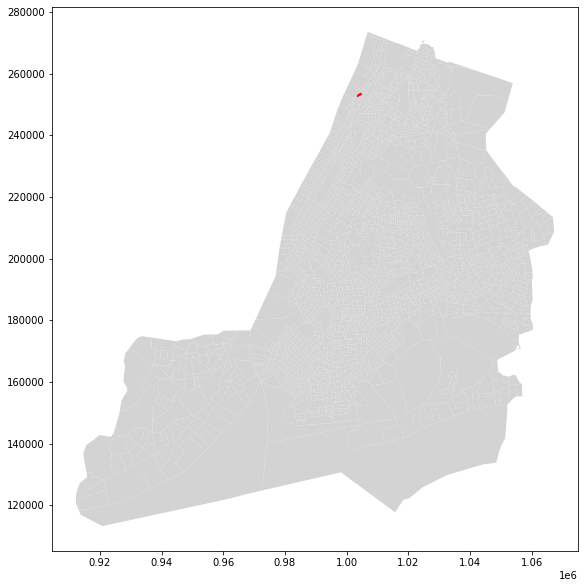

In [44]:
# find that island

fig, ax = plt.subplots()

ct.plot(color='lightgray', ax=ax)
ct.iloc[[224]].plot(color='r', ax=ax)

In [45]:
# remove that island

ct = ct.drop(224)

In [46]:
ct = ct.reset_index()

In [47]:
# calculate weights again

w = Queen.from_dataframe(ct)

(908748.6905727447, 1073594.1918000756, 113848.10155612661, 279838.42770755664)

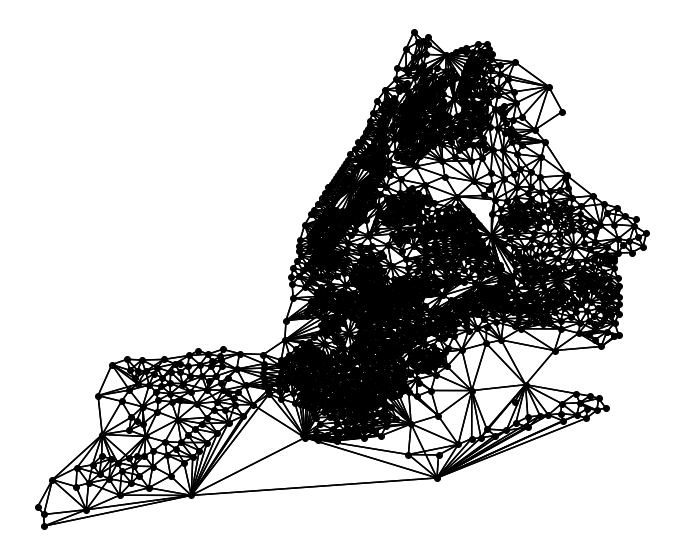

In [48]:
w.plot(ct)

plt.axis('off')

In [49]:
from esda.moran import Moran
from esda.geary import Geary

In [50]:
moran = Moran(ct['canopy gain (percent)'], w)
moran.I

nan

In [51]:
# why?

In [52]:
ct['canopy gain (percent)'].isna().any()

True

In [53]:
# because there is missing data

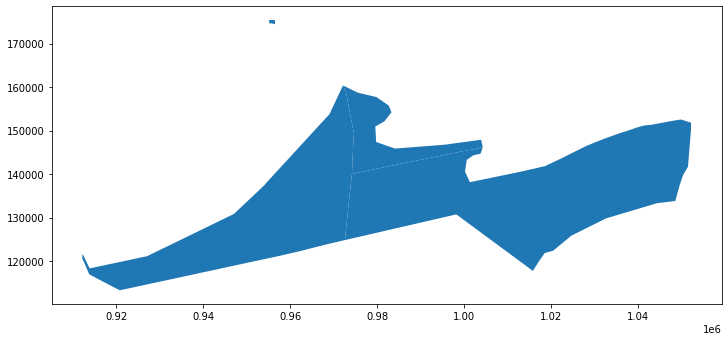

In [54]:
ct[ct['canopy gain (percent)'].isna()].plot()

In [55]:
# for this^ area of water

In [56]:
# need a unique W matrix for each var, removing the null values for each

In [57]:
Ws_list = []

w = Queen.from_dataframe(ct)

for var in vars:     

  # if data is complete, use W computed before
  if ct[var].notna().all():
    Ws_list.append(w)

  # else (if missing data) drop rows with missing data and compute new W
  else:
    ct_process_w = ct.dropna(subset=[var])
    w_special = Queen.from_dataframe(ct_process_w)
    Ws_list.append(w_special)
    
    ct_process_w = None
    w_special = None

Ws = pd.DataFrame(index=vars, data={'W':Ws_list})

/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 4 islands with ids: 126, 182, 1138, 1435.
  warnings.warn(message)
/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 3 islands with ids: 263, 1237, 1534.
  warnings.warn(message)
/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 2 islands with ids: 1292, 1592.
  warnings.warn(message)
/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 2 islands with ids: 1292, 1592.
  warnings.warn(message)


In [58]:
Is = []
Cs = []

for var in vars:

  moran = Moran(ct[var].dropna(), Ws.loc[var,'W'])
  Is.append(moran.I)

  geary = Geary(ct[var].dropna(), Ws.loc[var,'W'])
  Cs.append(geary.C)


autocorrelation = pd.DataFrame(index=vars, data={'Morans I':Is, 'Gearys c':Cs})
autocorrelation

('WARNING: ', 126, ' is an island (no neighbors)')
('WARNING: ', 182, ' is an island (no neighbors)')
('WARNING: ', 1138, ' is an island (no neighbors)')
('WARNING: ', 1435, ' is an island (no neighbors)')
('WARNING: ', 263, ' is an island (no neighbors)')
('WARNING: ', 1237, ' is an island (no neighbors)')
('WARNING: ', 1534, ' is an island (no neighbors)')
('WARNING: ', 1292, ' is an island (no neighbors)')
('WARNING: ', 1592, ' is an island (no neighbors)')
('WARNING: ', 1292, ' is an island (no neighbors)')
('WARNING: ', 1592, ' is an island (no neighbors)')


Morans I  Gearys c
canopy no change (area)                             0.375933  1.120571
canopy gain (area)                                  0.458079  0.853460
canopy loss (area)                                  0.436109  0.935747
canopy change (net)(area)                           0.363891  0.935715
canopy total 2010 (area)                            0.382596  1.109144
canopy total 2017 (area)                            0.391052  1.090701
canopy gain (percent)                               0.388904  0.619380
canopy loss (percent)                               0.425008  0.562669
canopy 2010 per area (percent)                      0.327888  0.566595
canopy 2017 per area (percent)                      0.326283  0.567642
canopy change residual                              0.225870  1.107669
White (percent)                                     0.832046  0.170860
Black (percent)                                     0.894885  0.108840
Asian (percent)                                     0.736550  0.303175
Latino_Hispanic (any race) (percent)                0.782578  0.226995
single family homes (percent of hhs)                0.692958  0.316437
owner occupied (percent of hhs)                     0.693717  0.313571
renter (percent of hhs)                             0.693714  0.313574
moved in since 2005 (percent of hhs)                0.292908  0.746845
home value                                          0.486496  0.503918
rent                                                0.453811  0.542652
rent burdened (rent per income over 35 percent)...  0.206505  0.811600
building built since 2000 (percent of hhs)          0.197895  0.886618
median income                                       0.653858  0.346884

Text(0.5, 1.0, "spatial autocorrelation (Moran's I)")

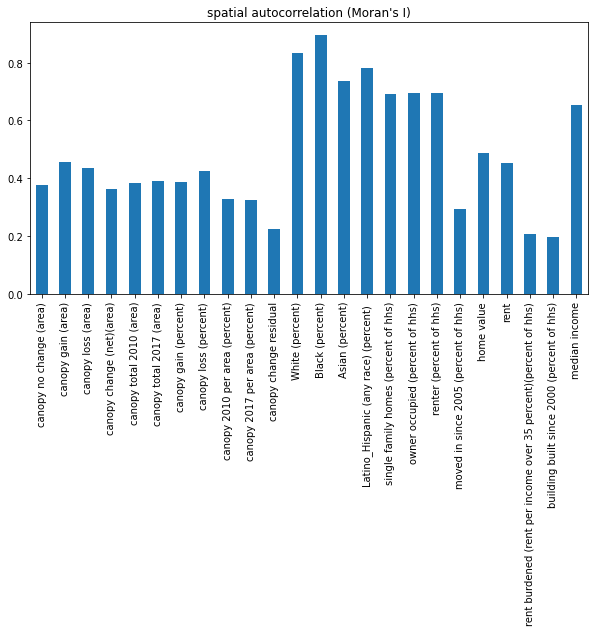

In [59]:
autocorrelation['Morans I'].plot.bar(figsize=(10,5))

plt.title("spatial autocorrelation (Moran's I)")

Text(0.5, 1.0, "spatial autocorrelation (Geary's c)")

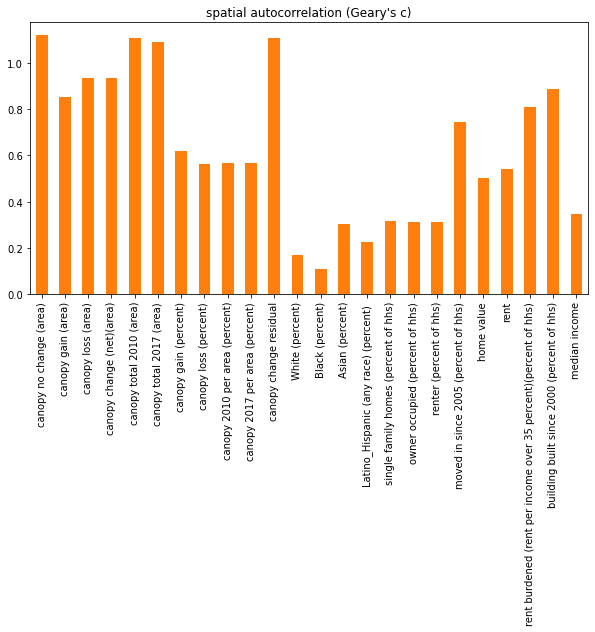

In [61]:
autocorrelation['Gearys c'].plot.bar(figsize=(10,5), color='C1')

plt.title("spatial autocorrelation (Geary's c)")

In [ ]:
! pip install splot

In [ ]:
from splot.esda import moran_scatterplot

In [ ]:
var = 'canopy gain (percent)'

moran = Moran(ct[var].dropna(), Ws.loc[var,'W'])

In [ ]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

In [ ]:
# some possibly interesting outliers to explore here, at very high attribute values but not so high lag values. also, quite a few values that stick out in the negative autocorrelation upper left quadrant. ...for further exploration.

# spatially adjusted regression

In [ ]:
import spreg

In [ ]:
ct_gain_vs_owner = ct.dropna(subset=['canopy gain (percent)', 'owner occupied (percent of hhs)'])

In [ ]:
w_gain_vs_owner = Queen.from_dataframe(ct_gain_vs_owner)

In [ ]:
y = ct_gain_vs_owner['canopy gain (percent)'].to_numpy().reshape(-1,1)
x = ct_gain_vs_owner['owner occupied (percent of hhs)'].to_numpy().reshape(-1,1)

In [ ]:
x.reshape

<function ndarray.reshape>

In [ ]:
ols = spreg.OLS(y=y, 
          x=x, 
          w=w_gain_vs_owner,
          moran=True,
          name_y='percent canopy gain',
          name_x=['percent owner-occupied housing']
          )

In [ ]:
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :percent canopy gain                Number of Observations:        2116
Mean dependent var  :      0.3286                Number of Variables   :           2
S.D. dependent var  :      0.1646                Degrees of Freedom    :        2114
R-squared           :      0.0948
Adjusted R-squared  :      0.0944
Sum squared residual:      51.883                F-statistic           :    221.3590
Sigma-square        :       0.025                Prob(F-statistic)     :   1.084e-47
S.E. of regression  :       0.157                Log likelihood        :     920.901
Sigma-square ML     :       0.025                Akaike info criterion :   -1837.802
S.E of regression ML:      0.1566                Schwarz criterion     :   -1826.487

----------------------------------------------------------------------

In [ ]:
# regular OLS gets R2 of 0.09 (coefficient is significant)

In [ ]:
lag = spreg.GM_Lag(x=x, y=y, w=w_gain_vs_owner)

In [ ]:
print(lag.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        2116
Mean dependent var  :      0.3286                Number of Variables   :           3
S.D. dependent var  :      0.1646                Degrees of Freedom    :        2113
Pseudo R-squared    :      0.0271
Spatial Pseudo R-squared:  0.0187

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       0.6661270       0.0573462      11.6158966       0.0000000
               var_1      -0.0032982       0.0003373      -9.7790693       0.0000000
           W_dep_var      -0.1052706       0.0226197      -

In [ ]:
# with spatial lag regression, (pseudo-) R2 is also not good fit. coefficient is still significant. 

# plot all pairwise relationships

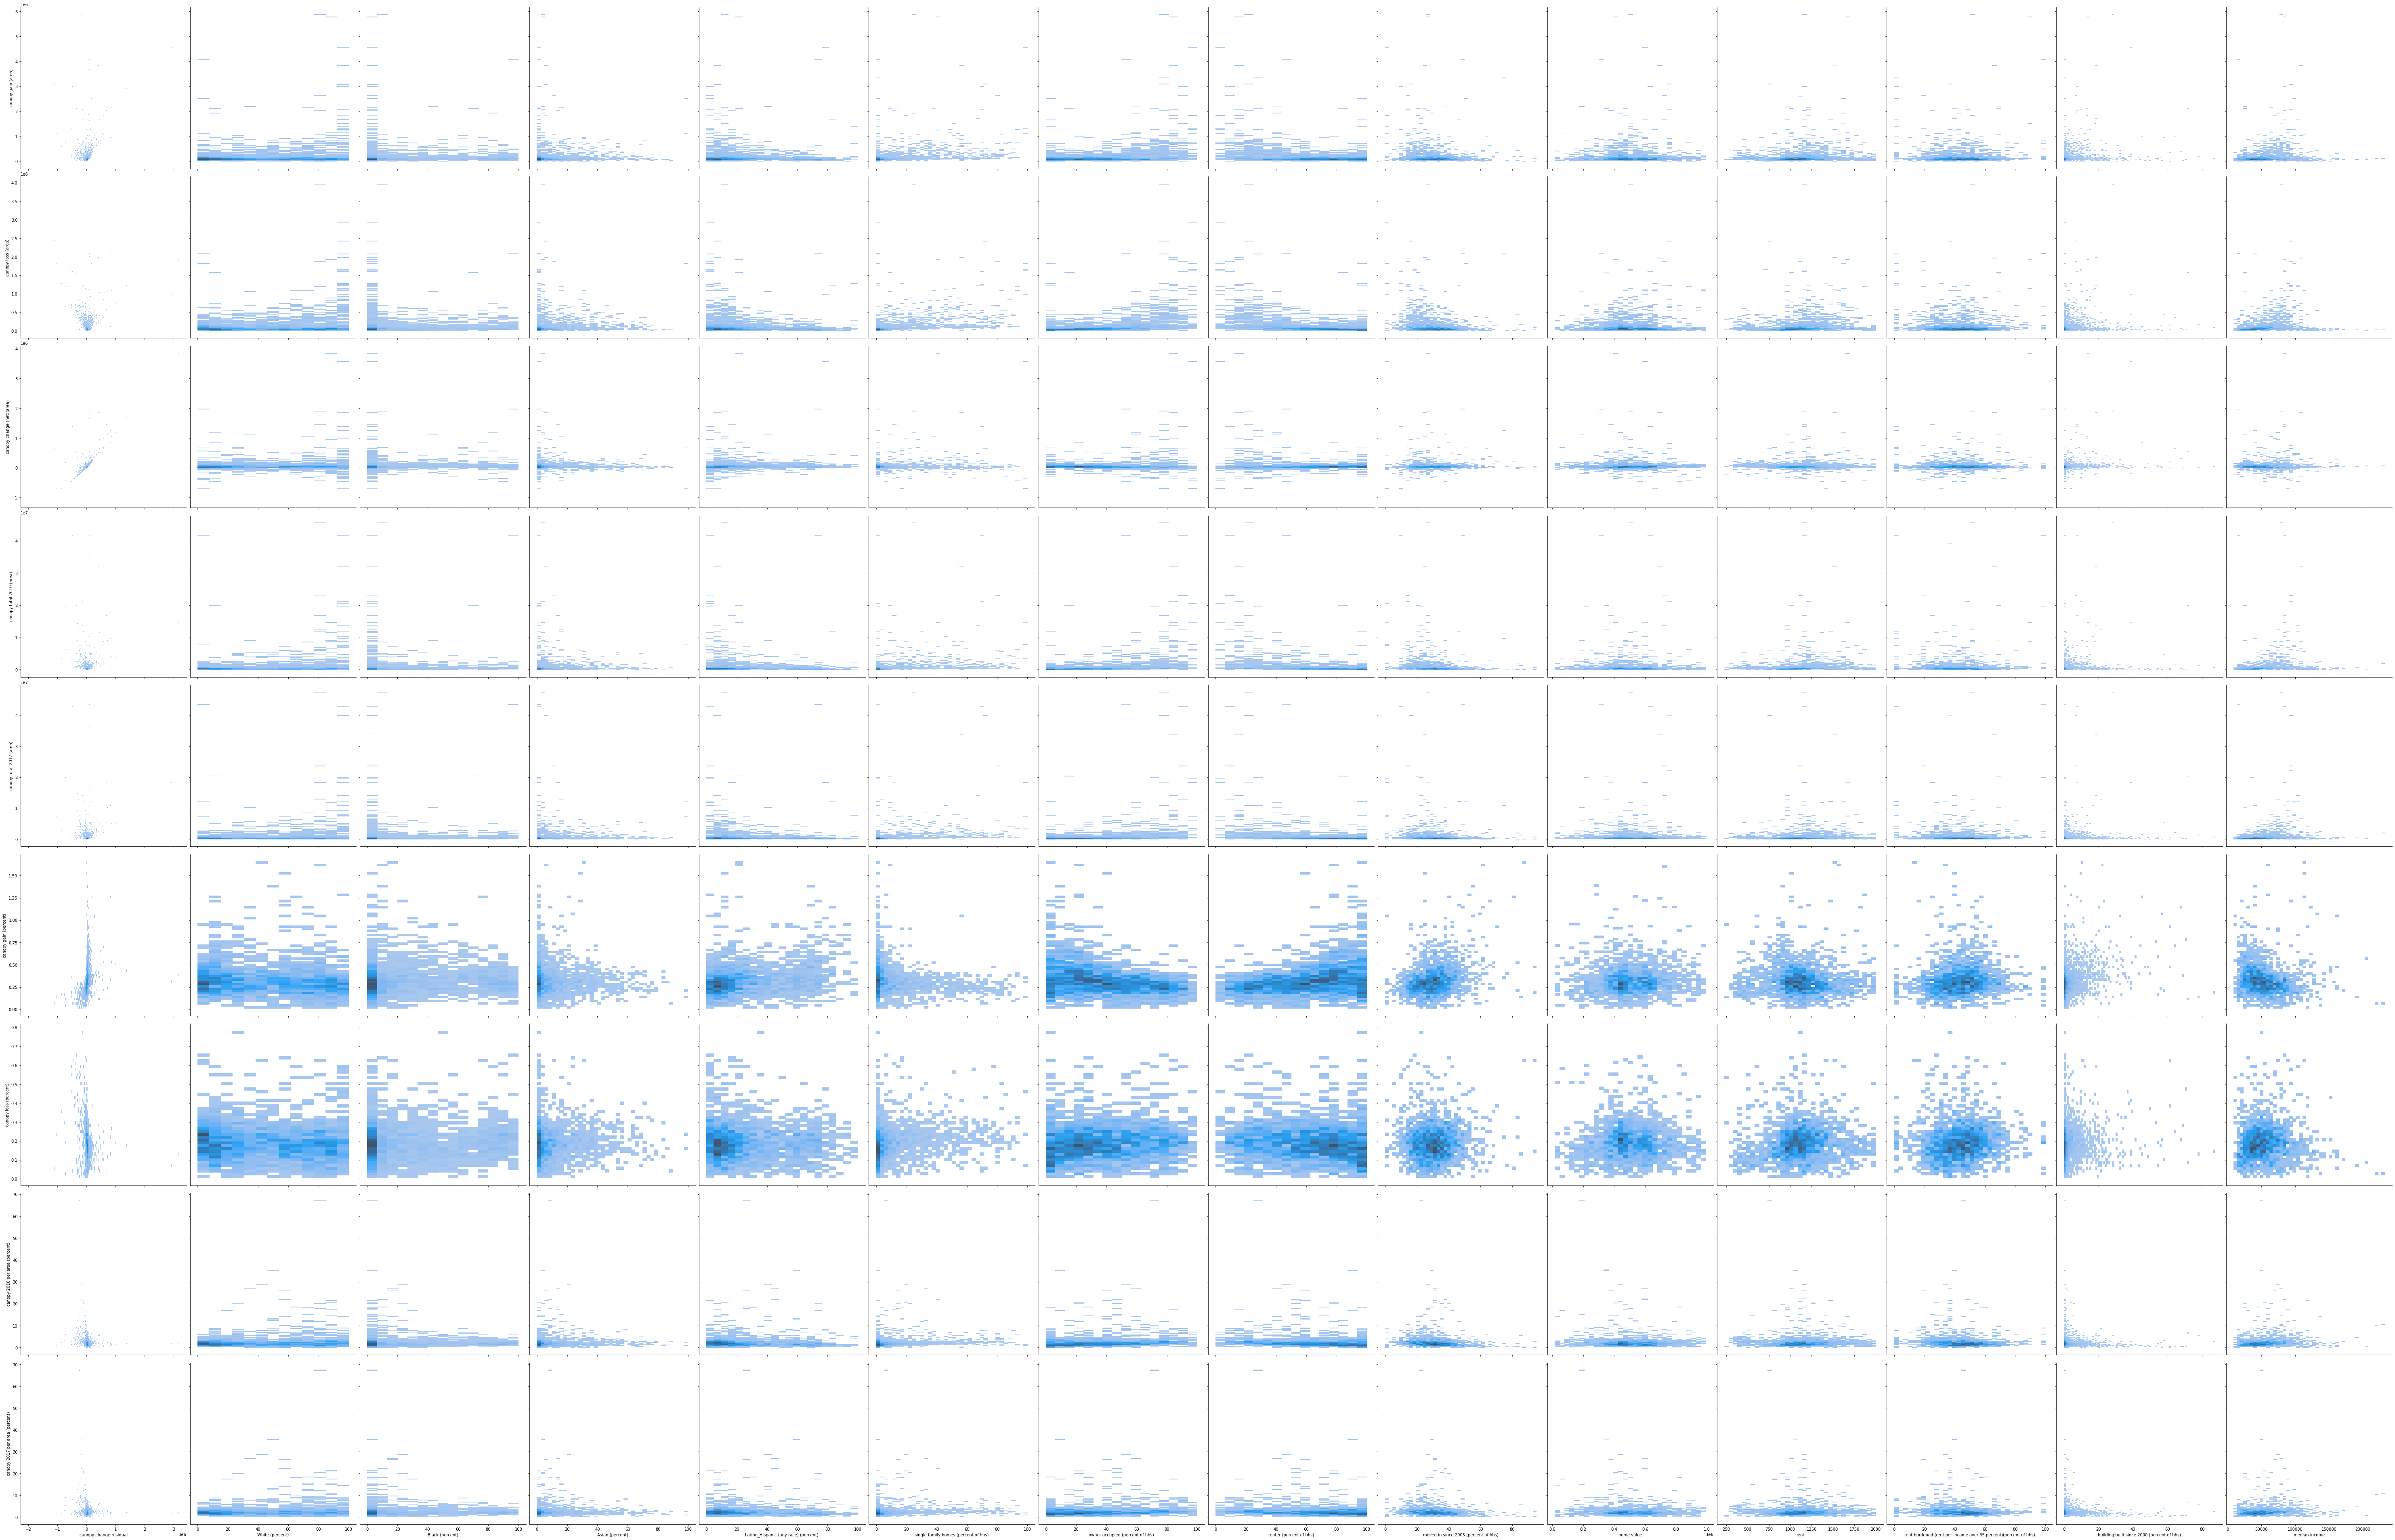

In [ ]:
#fig = plt.subplots(figsize = (20,20))

p = sns.pairplot(
    data=ct,
    y_vars = vars[1:10],
    x_vars = vars[10:],
    height=6, aspect=1,
    kind='hist')
 
p.figure.figsize = (20,20)

# remove ocean tracts

In [62]:
ct = ct[ct['canopy gain (percent)'].notna()]

# column-standardize data 

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
# compute standardized columns

ct_s_arrays = StandardScaler().fit(ct[vars]).transform(ct[vars])

In [65]:
ct_s = gpd.GeoDataFrame(columns=vars, index=ct.index, data=ct_s_arrays, geometry=ct['geometry']).merge(ct['GEOID'], left_index=True, right_index=True)

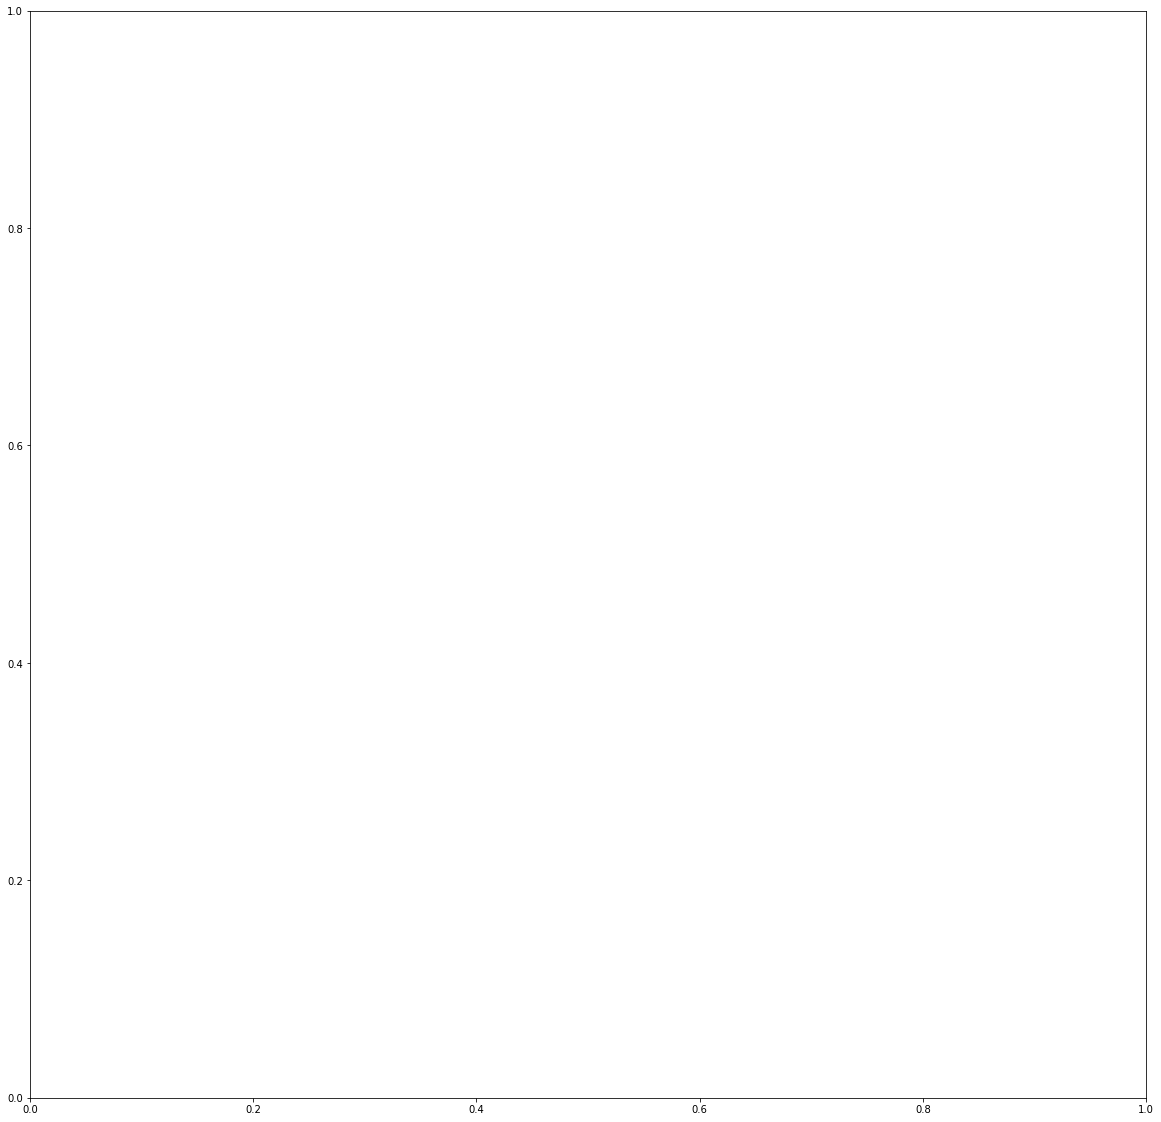

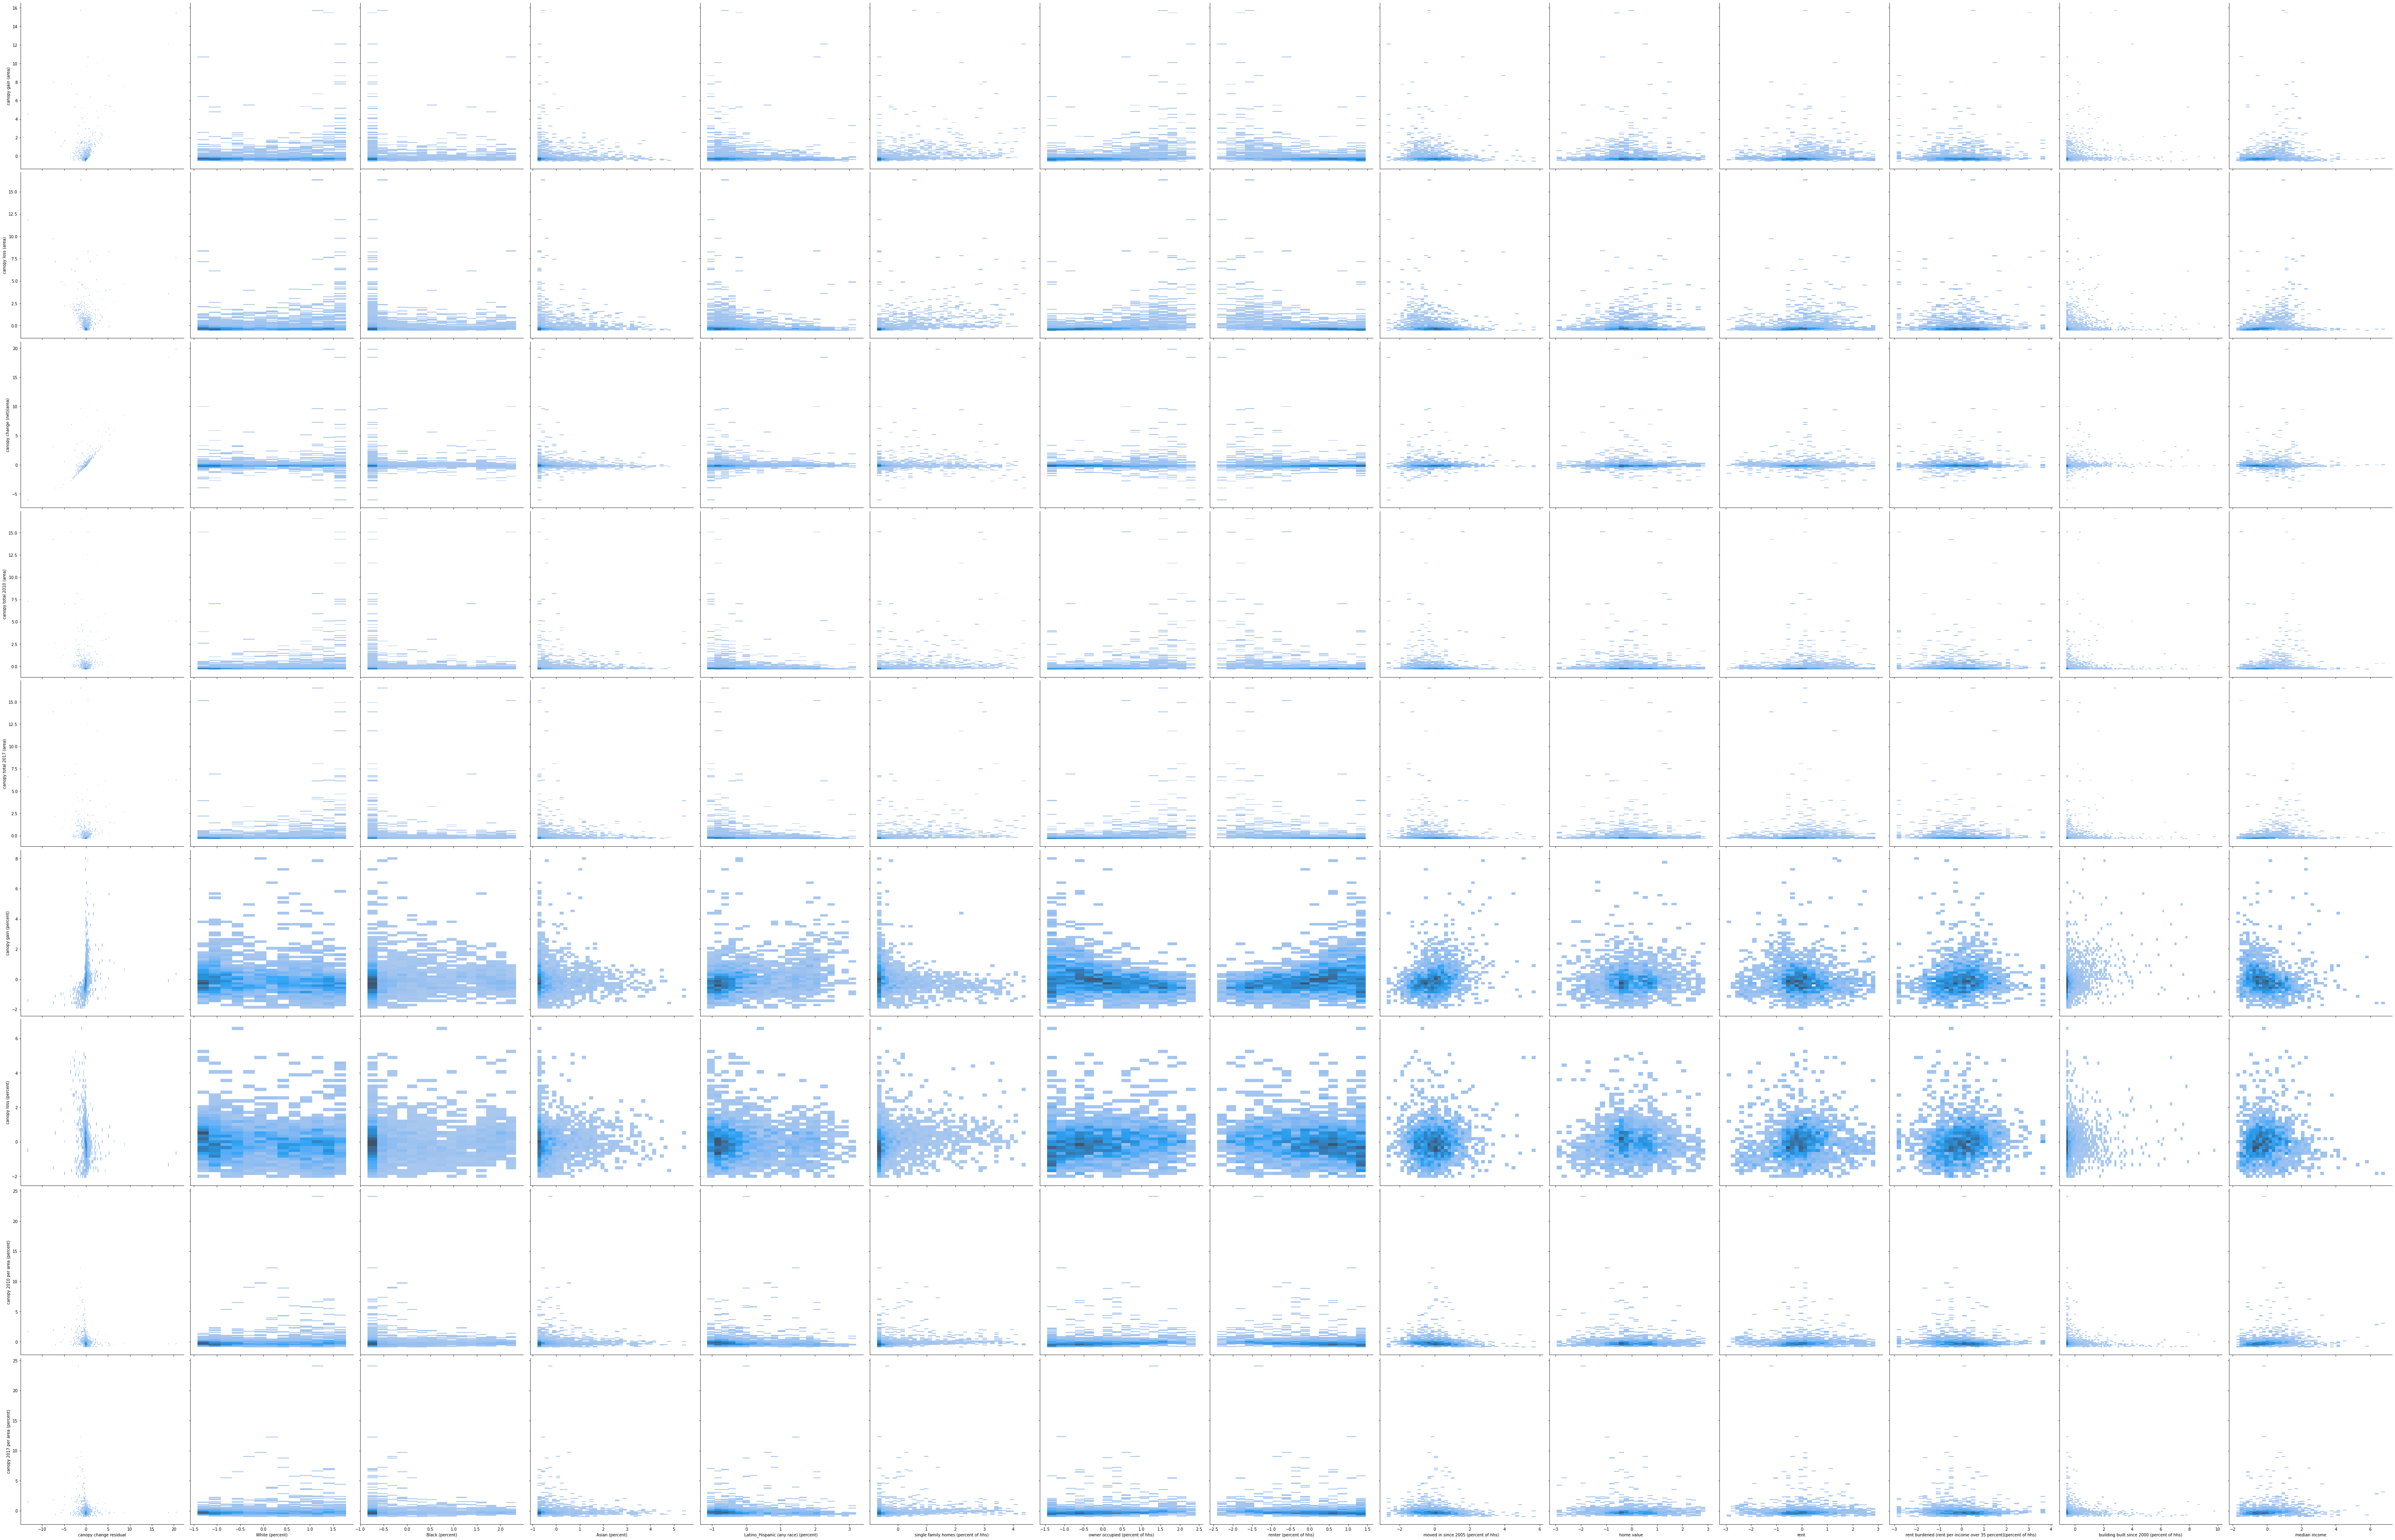

In [66]:
fig = plt.subplots(figsize = (20,20))

p = sns.pairplot(
    data=ct_s,
    y_vars = vars[1:10],
    x_vars = vars[10:],
    height=6, aspect=1,
    kind='hist')

p.figure.figsize = (20,20)

In [67]:
plt.rcParams['figure.figsize'] = (12,10)

# geographically weighted regression

In [68]:
pip install mgwr

     |████████████████████████████████| 41 kB 240 kB/s 
     |████████████████████████████████| 209 kB 6.1 MB/s 
  Created wheel for mgwr: filename=mgwr-2.1.2-py3-none-any.whl size=46386 sha256=7a6e36f73f18493cf0e5a8cf71bcfffac67bbd04d4f86a699c9c015f3584a265
  Stored in directory: /root/.cache/pip/wheels/e8/55/57/c1bf993ab0ab4b9885ac1fdf7f9f960397355cf889b77a3e4b
  Created wheel for spglm: filename=spglm-1.0.8-py3-none-any.whl size=38806 sha256=de1ca28fa954bc622f1481f3a2cf30c3904c46e508cadc8c5a8e8122e7e6c58a
  Stored in directory: /root/.cache/pip/wheels/29/79/e9/453e3b0d858bed16e097c6e6bbd75e2b966bfcfb21b12790d0
Successfully built mgwr spglm


In [69]:
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from sklearn.preprocessing import StandardScaler

In [70]:
# choose exog and endog variables

x_var = 'owner occupied (percent of hhs)'
y_var = 'canopy gain (percent)'

In [71]:
# drop missing data

ct_dropna = ct_s.dropna(subset=[x_var, y_var])

In [72]:
x = ct_dropna[x_var].to_numpy().reshape(-1,1)
y = ct_dropna[y_var].to_numpy().reshape(-1,1)

In [73]:
# get centroids of and store as list of coordinates

ct_points = []
for points in ct_dropna.centroid:
    ct_points.append([points.x, points.y])

print(ct_points)

[[961697.4395894024, 170412.49186172945], [967419.3901721417, 164325.57158333863], [961762.2865515167, 175378.06351031247], [969205.9205895154, 158490.17358254493], [965944.570282224, 174059.05334094662], [965449.1491541154, 162236.30738763858], [961255.6018194879, 173260.39952289916], [964530.4271772228, 160432.36363331493], [964743.2093023628, 158442.07338909304], [948060.3192007059, 143115.48969208283], [965266.3465734328, 169337.27910193667], [963033.8529823486, 166475.2460733259], [961279.9453570046, 165045.38005087446], [961307.4316693201, 172010.64874064186], [960207.7216841117, 167211.80983226426], [963175.0837014389, 161909.7227944843], [958335.2123065601, 165605.77726301434], [961799.5576991206, 162836.411660077], [957946.7764127939, 163054.8483837228], [960363.5446791872, 159394.6841798145], [956699.8860675883, 167113.23134026516], [962448.2824044124, 156877.57035195202], [963257.1847799051, 152982.08768761632], [966821.8161292796, 155013.11138249995], [959007.3837541222, 17

In [74]:
# search for best bandwidth

gwr_selector = Sel_BW(ct_points, y, x)
gwr_bw = gwr_selector.search()

print(gwr_bw)

46.0


In [75]:
# fit gwr

gwr_results = GWR(ct_points, y, x, gwr_bw).fit()

In [76]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                2115
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           1909.511
Log-likelihood:                                                   -2892.971
AIC:                                                               5789.941
AICc:                                                              5791.953
BIC:                                                             -14269.328
R2:                                                                   0.096
Adj. R2:                                                              0.095

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [77]:
gwr_results.R2

0.4548678130385365

In [78]:
# (pseudo-) R2 up to .45 = ok ~

In [79]:
# put gwr results into geodataframe with original ct areas

result = gpd.GeoDataFrame(gwr_results.params, columns=['c0', 'c1'], geometry=ct['geometry'])
result['local R2'] = gwr_results.localR2

In [80]:
from matplotlib.colors import TwoSlopeNorm

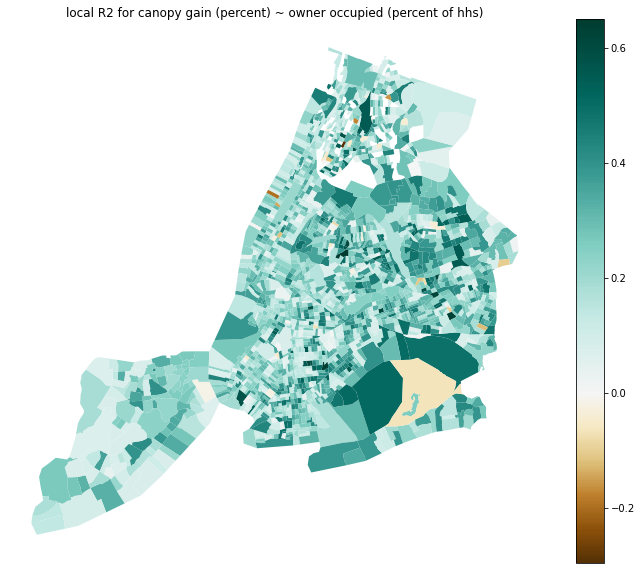

In [81]:
fig, ax = plt.subplots()

# norm colors
vmin, vmax, vcenter = result['local R2'].min(), result['local R2'].max(), 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
cmap = 'BrBG'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

# plot data
result.plot(column='local R2', cmap=cmap, norm=norm, ax=ax)

plt.title(f'local R2 for {y_var} ~ {x_var}')

# show legend
fig.colorbar(cbar)
plt.axis('off')

plt.show()


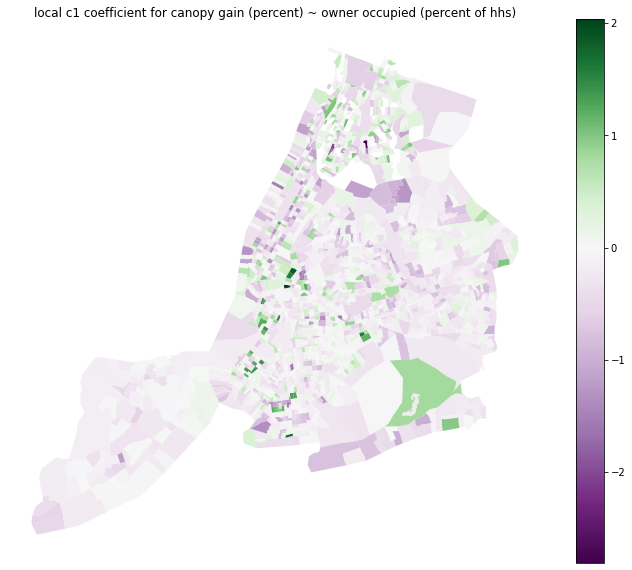

In [82]:
fig, ax = plt.subplots()

# norm colors
vmin, vmax, vcenter = result['c1'].min(), result['c1'].max(), 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
cmap = 'PRGn'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

# plot data
result.plot(column='c1', cmap=cmap, norm=norm, ax=ax)

plt.title(f'local c1 coefficient for {y_var} ~ {x_var}')

# show legend
fig.colorbar(cbar)
plt.axis('off')

plt.show()

In [84]:
from mpl_toolkits.axes_grid import make_axes_locatable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  """Entry point for launching an IPython kernel.


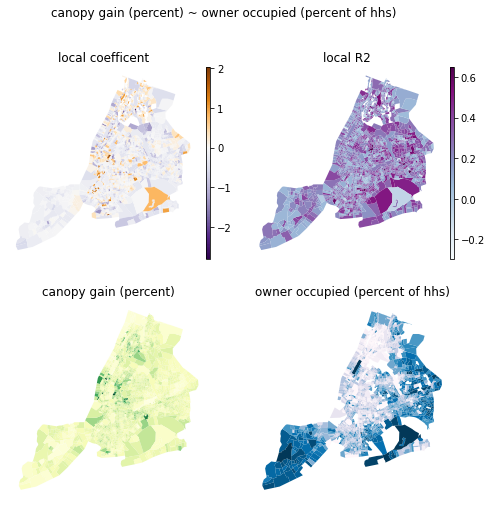

In [85]:
fig, ax = plt.subplots(2,2, figsize=(8,8))

## local coefficient map

# place colorband legend
divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes('right', size='2%', pad=0.1)

# norm colors
vmin, vmax, vcenter = result['c1'].min(), result['c1'].max(), 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
cmap = 'PuOr_r'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

# plot data
result.plot(column='c1', cmap=cmap, norm=norm, legend=True, ax=ax[0,0], cax=cax)

ax[0,0].set_title('local coefficent')
ax[0,0].axis('off')



## local R2 

# place colorband legend
divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes('right', size='2%', pad=0.1)

result.plot(column='local R2', cmap='BuPu', ax=ax[0,1], legend=True, cax=cax)
ax[0,1].set_title(f'local R2')
ax[0,1].axis('off')


## canopy change map
ct_s.plot(column=f'{y_var}', cmap='YlGn', ax=ax[1,0])
ax[1,0].set_title(f'{y_var}')
ax[1,0].axis('off')


## x var map
ct_s.plot(column=f'{x_var}', cmap='PuBu', ax=ax[1,1])
ax[1,1].set_title(f'{x_var}')
ax[1,1].axis('off')


plt.suptitle(f'{y_var} ~ {x_var}')

plt.show()

# all the GWRs! 

In [86]:
from matplotlib.colors import Normalize

In [89]:
def gwr_iterator(y_vars, 
                 x_vars, 
                 bw=None, 
                 data=ct_s, 
                 result_stats=['R2','aic'], 
                 c1_cmap='PuOr_r', 
                 R2_cmap='RdBu', 
                 y_cmap='YlGn', 
                 x_cmap='BuPu',
                 scale_bars = True
                 ):
    
    # to store results
    gwr_performance = pd.DataFrame(index=pd.MultiIndex.from_product([y_vars,x_vars], names=['y_var', 'x_var']))
    
    for y_var in y_vars:
      for x_var in x_vars: 
        
        # drop NaNs for vars
        data_dropna = data.dropna(subset=[x_var, y_var]).reset_index()

        x = data_dropna[x_var].to_numpy().reshape(-1,1)
        y = data_dropna[y_var].to_numpy().reshape(-1,1)


        # get centroids of and store as list of coordinates
        data_points = []
        for points in data_dropna.centroid:
          data_points.append([points.x, points.y])


        # search for best bandwidth
        if bw:
          gwr_bw = bw
        else:
          gwr_selector = Sel_BW(data_points, y, x)
          gwr_bw = gwr_selector.search()

        # fit gwr
        try:
          gwr_results = GWR(data_points, y, x, gwr_bw).fit()
        
        # handle an issue from insufficient data
        except:
          print( f'exception: insufficient data on {y_var}, {x_var}')
          continue

        # store stats
        gwr_performance.loc[(y_var, x_var), 'bw'] = gwr_bw
        for stat in result_stats:
          gwr_performance.loc[(y_var, x_var), stat] = getattr(gwr_results, stat)

        # put gwr results into (local) geodataframe with original areas
        result = gpd.GeoDataFrame(
            gwr_results.params, columns=['c0', 'c1'], 
            geometry=data_dropna['geometry'])
        result['local R2'] = gwr_results.localR2

        ### map ###

        fig, ax = plt.subplots(2,2, figsize=(9,9))

        # norm colors
  
        if result['c1'].min() < 0:
          c1_norm = TwoSlopeNorm(vmin=result['c1'].min(), vmax=result['c1'].max(), vcenter=0, )
        else:
          c1_norm = Normalize()
        cbar = plt.cm.ScalarMappable(norm=c1_norm, cmap=c1_cmap)

        if result['local R2'].min() < 0:
          R2_norm = TwoSlopeNorm(vmin=result['local R2'].min(), vmax=result['local R2'].max(), vcenter=0)
        else:
          R2_norm = Normalize()
        cbar = plt.cm.ScalarMappable(norm=R2_norm, cmap=R2_cmap)

        y_norm = TwoSlopeNorm(vmin=data[y_var].min(), vcenter=0, vmax=data[y_var].max())
        cbar = plt.cm.ScalarMappable(norm=y_norm, cmap=y_cmap)

        x_norm = TwoSlopeNorm(vmin=data[x_var].min(), vcenter=0, vmax=data[x_var].max())
        cbar = plt.cm.ScalarMappable(norm=x_norm, cmap=x_cmap)

        ## local coefficient map

        # place colorband legends
        cax_00 = make_axes_locatable(ax[0,0]).append_axes('right', size='2%', pad=0.1)

        if scale_bars:
          cax_01 = make_axes_locatable(ax[0,1]).append_axes('right', size='2%', pad=0.1)
          cax_10 = make_axes_locatable(ax[1,0]).append_axes('right', size='2%', pad=0.1)
          cax_11 = make_axes_locatable(ax[1,1]).append_axes('right', size='2%', pad=0.1)

        # plot data
        result.plot(column='c1', cmap=c1_cmap, norm=c1_norm, legend=True, ax=ax[0,0], cax=cax_00)

        ax[0,0].set_title('local coefficent')
        ax[0,0].axis('off')

        ## local R2 map

        result.plot(column='local R2', cmap=R2_cmap, norm=R2_norm, ax=ax[0,1], legend=scale_bars, cax=cax_01)
        ax[0,1].set_title(f'local R2')
        ax[0,1].axis('off')

        ## y var map
        data_dropna.plot(column=f'{y_var}', cmap=y_cmap, norm=y_norm, ax=ax[1,0], legend=scale_bars, cax=cax_10)
        ax[1,0].set_title(f'{y_var}')
        ax[1,0].axis('off')

        ## x var map
        data_dropna.plot(column=f'{x_var}', cmap=x_cmap, norm=x_norm, ax=ax[1,1], legend=scale_bars, cax=cax_11)
        ax[1,1].set_title(f'{x_var}')
        ax[1,1].axis('off')


        plt.suptitle(f'{y_var} ~ {x_var}')

        plt.show()


    return gwr_performance

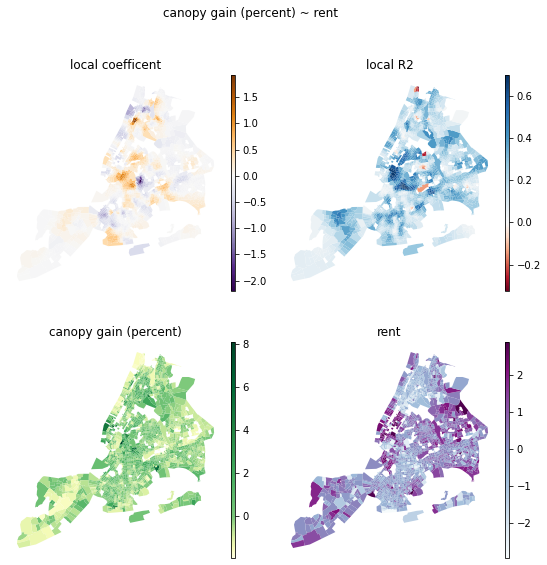

bw        R2         aic
y_var                 x_var                            
canopy gain (percent) rent   46.0  0.475061  4856.91045

In [90]:
gwr_iterator(['canopy gain (percent)'],['rent'])

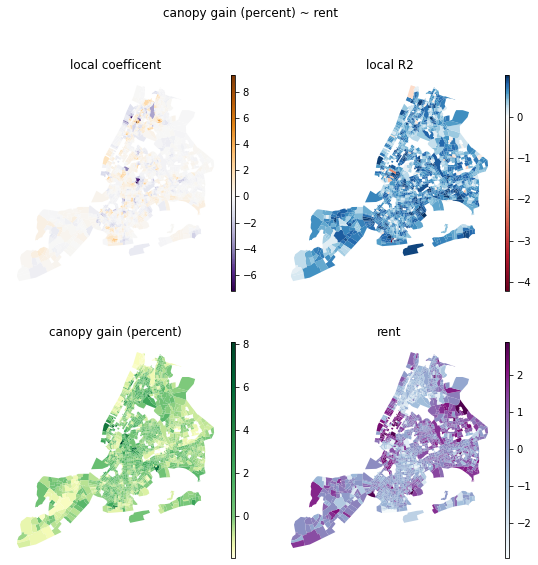

bw        R2        aic
y_var                 x_var                           
canopy gain (percent) rent   10.0  0.796437  4426.6513

In [91]:
gwr_iterator(['canopy gain (percent)'],['rent'], bw=10)

In [96]:
vars

['canopy no change (area)',
 'canopy gain (area)',
 'canopy loss (area)',
 'canopy change (net)(area)',
 'canopy total 2010 (area)',
 'canopy total 2017 (area)',
 'canopy gain (percent)',
 'canopy loss (percent)',
 'canopy 2010 per area (percent)',
 'canopy 2017 per area (percent)',
 'canopy change residual',
 'White (percent)',
 'Black (percent)',
 'Asian (percent)',
 'Latino_Hispanic (any race) (percent) ',
 'single family homes (percent of hhs)',
 'owner occupied (percent of hhs)',
 'renter (percent of hhs)',
 'moved in since 2005 (percent of hhs)',
 'home value',
 'rent',
 'rent burdened (rent per income over 35 percent)(percent of hhs)',
 'building built since 2000 (percent of hhs)',
 'median income']

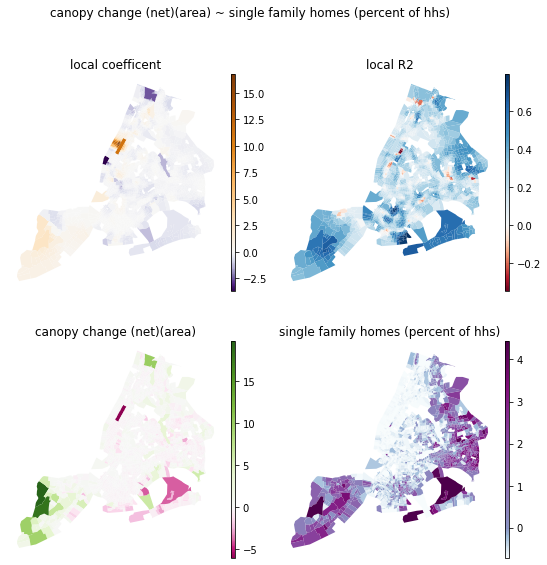

bw  \
y_var                     x_var                                        
canopy change (net)(area) single family homes (percent of hhs)  46.0   

                                                                      R2  \
y_var                     x_var                                            
canopy change (net)(area) single family homes (percent of hhs)  0.528022   

                                                                        aic  
y_var                     x_var                                              
canopy change (net)(area) single family homes (percent of hhs)  4655.362139

In [106]:
gwr_iterator(['canopy change (net)(area)'],['single family homes (percent of hhs)'], y_cmap = 'PiYG')

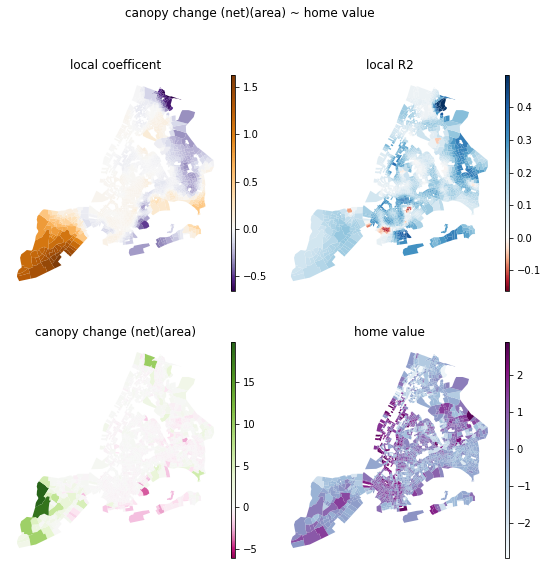

bw        R2          aic
y_var                     x_var                                   
canopy change (net)(area) home value  100.0  0.313689  4731.736662

In [104]:
gwr_iterator(['canopy change (net)(area)'],['home value'], bw=100, y_cmap = 'PiYG')

In [ ]:
gwr_iterator(['canopy gain (percent)','canopy 2017 per area (percent)','canopy change residual'],vars[11:])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
gwr_iterator(['canopy gain (percent)','canopy 2017 per area (percent)','canopy change residual'],vars[11:], bw=10)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
gwr_iterator(['canopy gain (percent)','canopy 2017 per area (percent)','canopy change residual'],vars[11:], bw=100)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
gwr_iterator(['canopy change residual', 'canopy change (net)(area)'], vars[11:], y_cmap='PiYG')

Output hidden; open in https://colab.research.google.com to view.

# GWR on fractal measure

In [123]:
frac.head()

noncanopy frac 2010  canopy frac 2010  noncanopy frac 2017  \
GEOID                                                                     
36061027100             1.182345          1.096982             1.114390   
36061012900             1.110692          1.097259             1.181303   
36061014401             1.149512          1.127940             1.218873   
36061009900             1.296445          1.092255             1.183441   
36061014601             1.285764          1.113610             1.203559   

             canopy frac 2017  noncanopy frac change  canopy frac change  \
GEOID                                                                      
36061027100          1.108241              -0.067955            0.011259   
36061012900          1.109161               0.070611            0.011903   
36061014401          1.145459               0.069361            0.017518   
36061009900          1.118850              -0.113004            0.026596   
36061014601          1.145191              -0.082206            0.031581   

                                                      geometry  
GEOID                                                           
36061027100  POLYGON ((1001773.055 249124.947, 1001861.139 ...  
36061012900  POLYGON ((981959.118 217931.241, 982628.457 21...  
36061014401  POLYGON ((998271.431 222317.750, 998321.577 22...  
36061009900  POLYGON ((984684.414 214548.671, 984620.971 21...  
36061014601  POLYGON ((998133.646 222069.924, 998004.435 22...

In [124]:
frac.iloc[:,:-1]

noncanopy frac 2010  canopy frac 2010  noncanopy frac 2017  \
GEOID                                                                     
36061027100             1.182345          1.096982             1.114390   
36061012900             1.110692          1.097259             1.181303   
36061014401             1.149512          1.127940             1.218873   
36061009900             1.296445          1.092255             1.183441   
36061014601             1.285764          1.113610             1.203559   
...                          ...               ...                  ...   
36061031703             1.210460          1.091264             1.196803   
36061031704             1.224221          1.095216             1.187946   
36061004400             1.189594          1.108197             1.195584   
36061008602             1.241646          1.095037             1.165201   
36061021303             1.255975          1.101637             1.268880   

             canopy frac 2017  noncanopy frac change  canopy frac change  
GEOID                                                                     
36061027100          1.108241              -0.067955            0.011259  
36061012900          1.109161               0.070611            0.011903  
36061014401          1.145459               0.069361            0.017518  
36061009900          1.118850              -0.113004            0.026596  
36061014601          1.145191              -0.082206            0.031581  
...                       ...                    ...                 ...  
36061031703          1.126653              -0.013657            0.035389  
36061031704          1.127380              -0.036275            0.032165  
36061004400          1.115029               0.005989            0.006833  
36061008602          1.109460              -0.076445            0.014423  
36061021303          1.119332               0.012905            0.017695  

[288 rows x 6 columns]

In [125]:
# test autocorrelation

In [126]:
w_frac = Queen.from_dataframe(frac)

AttributeError: ignored

In [ ]:
frac_vars = frac.columns[:-1].to_list()

In [ ]:
Ws_list = []

w_frac = Queen.from_dataframe(frac)

for var in frac_vars:     

  # if data is complete, use W computed before
  if frac[var].notna().all():
    Ws_list.append(w_frac)

  # else (if missing data) drop rows with missing data and compute new W
  else:
    frac_process_w = frac.dropna(subset=[var])
    w_special = Queen.from_dataframe(frac_process_w)
    Ws_list.append(w_special)
    
    frac_process_w = None
    w_special = None

Ws = pd.DataFrame(index=frac_vars, data={'W':Ws_list})

In [ ]:
Is = []
Cs = []

for var in frac_vars:

  moran = Moran(frac[var].dropna(), Ws.loc[var,'W'])
  Is.append(moran.I)

  geary = Geary(frac[var].dropna(), Ws.loc[var,'W'])
  Cs.append(geary.C)


autocorrelation = pd.DataFrame(index=frac_vars, data={'Morans I':Is, 'Gearys c':Cs})
autocorrelation

In [ ]:
autocorrelation['Morans I'].plot.bar(figsize=(10,5))

plt.title("spatial autocorrelation (Moran's I)")

In [ ]:
autocorrelation['Gearys c'].plot.bar(figsize=(10,5), color='C1')

plt.title("spatial autocorrelation (Gearys c)")

In [ ]:
# very low Moran's values are surprising/odd. but they may be driven by outliers as the c values do show some spatial autocorrelation

In [128]:
# compute standardized columns

frac_s_arrays = StandardScaler().fit(frac.iloc[:,:-1]).transform(frac.iloc[:,:-1])

In [129]:
frac_s = gpd.GeoDataFrame(columns=frac.columns[:-1], index=frac.index, data=frac_s_arrays, geometry=frac['geometry'])

In [130]:
frac_s = frac_s.join(ct_s.set_index('GEOID')[vars], how='left')

In [ ]:
# visulaize (non-spatial) relationships


p = sns.pairplot(
    data=frac_s,
    y_vars = ['noncanopy frac change', 'canopy frac change'],
    x_vars = vars[11:],
    height=6, aspect=1,
    kind='hist',
)

p.figure.figsize = (20,10)

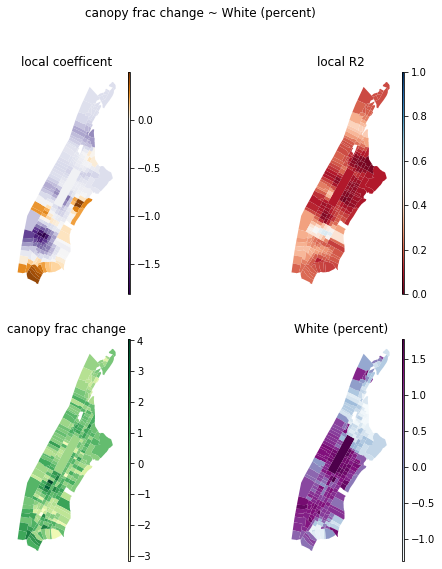

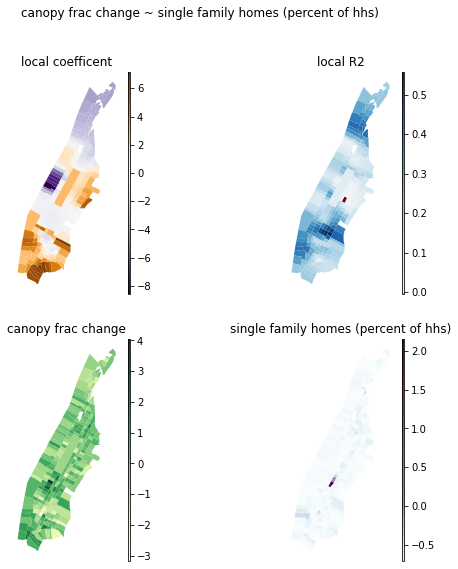

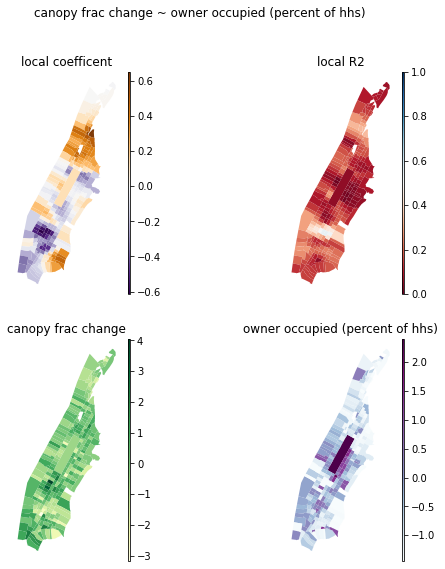

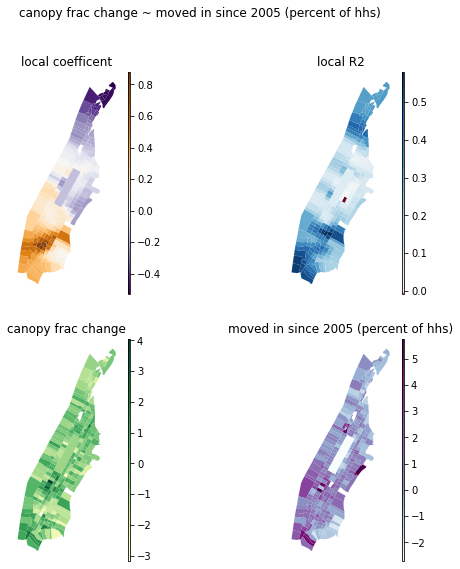

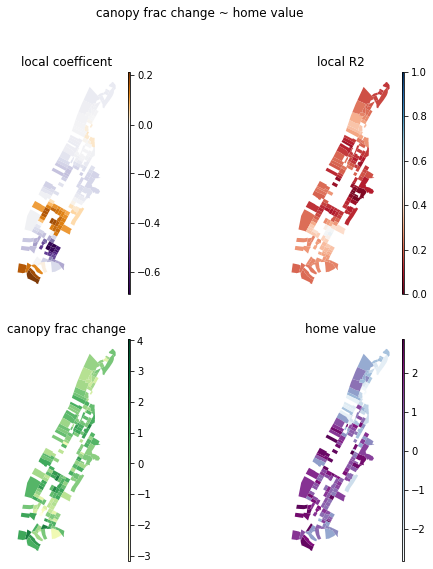

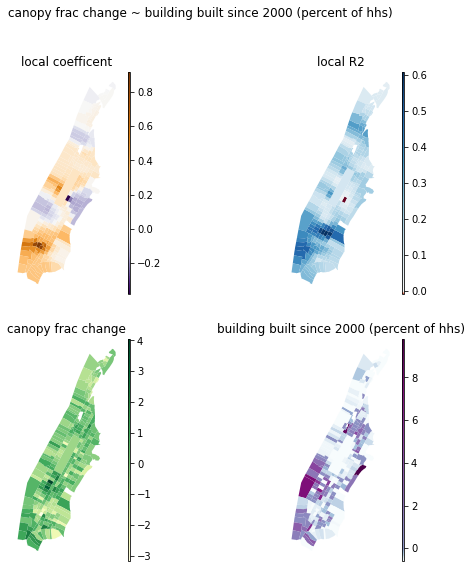

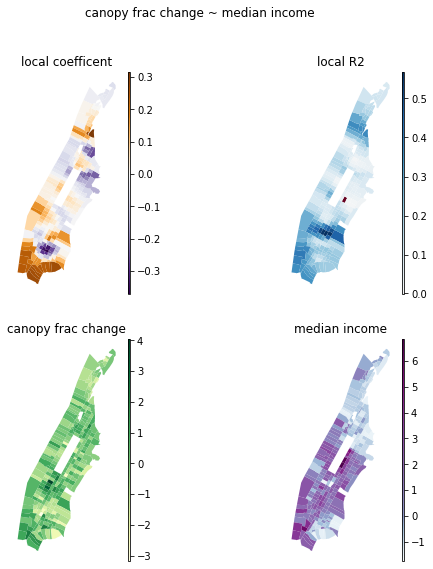

bw        R2  \
y_var              x_var                                                        
canopy frac change White (percent)                             47.0  0.339634   
                   single family homes (percent of hhs)        47.0  0.343979   
                   owner occupied (percent of hhs)             47.0  0.322005   
                   moved in since 2005 (percent of hhs)        46.0  0.388043   
                   home value                                  45.0  0.334428   
                   building built since 2000 (percent of hhs)  47.0  0.370380   
                   median income                               47.0  0.335532   

                                                                      aic  
y_var              x_var                                                   
canopy frac change White (percent)                             732.495528  
                   single family homes (percent of hhs)        729.929801  
                   owner occupied (percent of hhs)             742.773336  
                   moved in since 2005 (percent of hhs)        714.974706  
                   home value                                  459.148336  
                   building built since 2000 (percent of hhs)  718.598875  
                   median income                               734.285380

In [131]:
gwr_iterator(
    data = frac_s,
    y_vars = ['canopy frac change'],
    x_vars = ['White (percent)','single family homes (percent of hhs)',
       'owner occupied (percent of hhs)','moved in since 2005 (percent of hhs)', 'home value', 
       'building built since 2000 (percent of hhs)', 'median income'])